In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
text_foreigner = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt",sep="\t",\
                   encoding="cp949")

In [3]:
text_foreigner.columns = ['기준일자','구코드','행정동코드','업종코드','외국인 국가명','이용건수','이용금액']

In [4]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,20200516,350,640,71,오스트레일리아,1,39.0


In [5]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       3
dtype: int64

In [6]:
text_foreigner[text_foreigner["이용금액"].isna()==True].index

Int64Index([159857, 223832, 234647], dtype='int64')

In [7]:
print(text_foreigner.iloc[159857])
print(text_foreigner.iloc[223832])
print(text_foreigner.iloc[234647])

기준일자       20200422
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              1
이용금액            NaN
Name: 159857, dtype: object
기준일자       20200527
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              1
이용금액            NaN
Name: 223832, dtype: object
기준일자       20200423
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              6
이용금액            NaN
Name: 234647, dtype: object


NaN 값 value 확인 후 의미없는 데이터 확인

In [8]:
text_foreigner.drop(159857,0,inplace=True)
text_foreigner.drop(223832,0,inplace=True)
text_foreigner.drop(234647,0,inplace=True)

In [9]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       0
dtype: int64

In [10]:
text_foreigner.iloc[159857]

기준일자       20200416
구코드             110
행정동코드           565
업종코드             71
외국인 국가명          대만
이용건수              2
이용금액            138
Name: 159858, dtype: object

In [11]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,20200516,350,640,71,오스트레일리아,1,39.0


In [12]:
a = {"네덜란드":0,"대만":1,"독일":2,"러시아":3,"미국":4,"미주":5,"베트남":6,"스웨덴":7,"싱가폴":8,"아시아":9,\
     "영국" : 10,"오스트레일리아":11,"유럽":12,"일본":13,"정보없음":14,"중국":15,"중동/아프리카":16,"카자흐스탄":17\
     ,"캐나다":18,"태국":19,"프랑스":20,"필리핀":21,"홍콩":22}
text_foreigner["외국인 국가명"].replace(a,inplace=True)

In [15]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,대구 수성구,510,81,1,2,30.0
1,20190213,대구 수성구,510,40,1,2,32.0
2,20190416,대구 수성구,510,40,1,2,16.0
3,20190419,대구 수성구,510,42,1,3,610.0
4,20190308,대구 수성구,510,10,1,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,서울 노원구,640,40,11,6,29.0
238825,20200512,서울 노원구,612,40,11,3,15.0
238826,20200512,서울 노원구,670,40,11,2,13.0
238827,20200516,서울 노원구,640,71,11,1,39.0


In [14]:
a = pd.read_excel("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터\
(혁신아이디어분야)/카드소비데이터(신한카드)_데이터정의서.xlsx",sheet_name='2',\
header = 1)
del a["Unnamed: 0"]
a.index = a["구코드"]
del a["행정동코드"]
del a["구코드"]
del a["행정동명"]
a = {140: '서울 중구', 350: '서울 노원구', 260: '대구 수성구', 110: '대구 중구'}
text_foreigner["구코드"].replace(a,inplace=True)
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,대구 수성구,510,81,1,2,30.0
1,20190213,대구 수성구,510,40,1,2,32.0
2,20190416,대구 수성구,510,40,1,2,16.0
3,20190419,대구 수성구,510,42,1,3,610.0
4,20190308,대구 수성구,510,10,1,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,서울 노원구,640,40,11,6,29.0
238825,20200512,서울 노원구,612,40,11,3,15.0
238826,20200512,서울 노원구,670,40,11,2,13.0
238827,20200516,서울 노원구,640,71,11,1,39.0


구코드 한글화

In [347]:
text_foreigner["기준월"]  = pd.Series(map(lambda x:x//100,\
                                       text_foreigner["기준일자"]))

In [346]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       0
기준월        3
dtype: int64

In [53]:
text_resident = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt",\
                            sep = "\t")

In [54]:
text_resident.columns = ['기준일자','구코드','행정동코드','업종코드','성별코드','나이코드','이용건수','이용금액']

In [55]:
text_resident

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [56]:
a = {"F":1,"M":0}
text_resident["성별코드"].replace(a,inplace=True)

Text(0, 0.5, '이용금액')

/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from curren

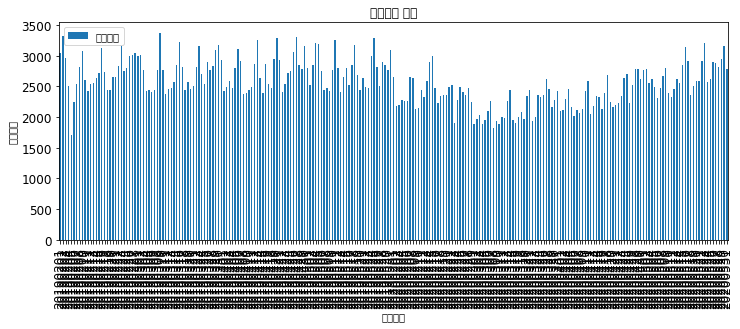

In [57]:
b = pd.DataFrame(text_resident.groupby(["기준일자"])["이용금액"].mean())
bx = b.plot(kind = 'bar',title = '이용금액 변화',figsize=(12, 4), legend=True, fontsize=12)
bx.set_xlabel('기준일자')          # x축 정보 표시
bx.set_ylabel('이용금액')     # y축 정보 표시

In [58]:
b[0:]

,이용금액
기준일자,
20190201,3049.496299
20190202,3325.264485
20190203,2956.011097
20190204,2511.145122
20190205,1707.495827
...,...
20200527,2887.480311
20200528,2820.778380
20200529,2951.582215


In [59]:
t = pd.DataFrame(text_foreigner.groupby(["기준일자"])["이용금액"].sum())
t

,이용금액
기준일자,
20190201,3640872.0
20190202,4252460.0
20190203,3655194.0
20190204,2865140.0
20190205,2694914.0
...,...
20200527,238412.0
20200528,290657.0
20200529,408025.0


/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from curren

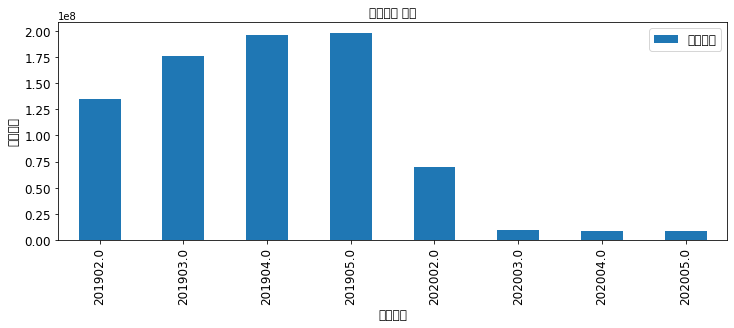

In [60]:
text_foreigner['기준월']=pd.Series(map(lambda x: int(x/100),text_foreigner['기준일자']))
a = pd.DataFrame(text_foreigner.groupby("기준월")["이용금액"].sum())
ax = a.plot(kind='bar', title='이용금액 변화', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('기준일자', fontsize=12)          # x축 정보 표시
ax.set_ylabel('이용금액', fontsize=12)     # y축 정보 표시
ax.legend(['이용금액'], fontsize=12) 

In [61]:
text_resident["기준월"] = pd.DataFrame(map(lambda x : int(x/100),text_resident["기준일자"]))

In [62]:
a = text_resident.groupby("기준월")["이용금액"].sum()
a

기준월
201902    815371053
201903    933075474
201904    904356231
201905    956527361
202002    707505641
202003    636354916
202004    707339938
202005    902985435
Name: 이용금액, dtype: int64

In [63]:
pd.DataFrame(text_resident.groupby(["행정동코드"])[["이용금액","이용건수"]].mean())

,이용금액,이용건수
행정동코드,,
510,2102.948038,58.058621
517,1676.797748,43.812759
520,11698.828003,762.741798
530,1561.234584,55.323171
540,6287.773115,159.558032
545,3923.542177,108.463654
550,5071.373067,192.286842
560,1336.959567,72.819545
561,929.834725,48.202116


/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyoungcho/opt/anaconda3/envs/BigContest/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from curren

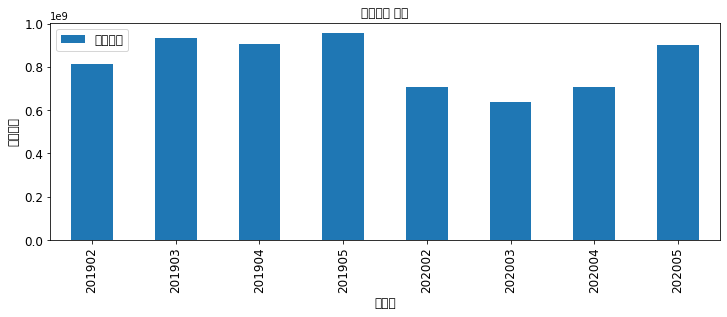

In [64]:
ax = a.plot(kind='bar', title='이용금액 변화', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('기준월', fontsize=12)          # x축 정보 표시
ax.set_ylabel('이용금액', fontsize=12)     # y축 정보 표시
ax.legend(['이용금액'], fontsize=12) 

In [65]:
import matplotlib.pyplot as plt

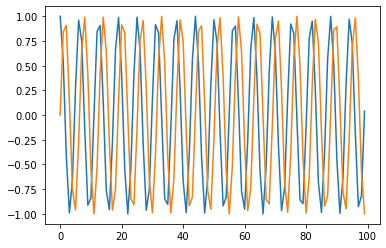

In [66]:
x = range(100)
y_1 = [np.cos(value) for value in x]
y_2 = [np.sin(value) for value in x]
plt.plot(x,y_1)
plt.plot(x,y_2)
plt.show()

In [349]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액,기준월
0,20190204,260,510,81,대만,2,30.0,201902.0
1,20190213,260,510,40,대만,2,32.0,201902.0
2,20190416,260,510,40,대만,2,16.0,201904.0
3,20190419,260,510,42,대만,3,610.0,201904.0
4,20190308,260,510,10,대만,7,629.0,201903.0
...,...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0,202005.0
238825,20200512,350,612,40,오스트레일리아,3,15.0,202005.0
238826,20200512,350,670,40,오스트레일리아,2,13.0,NaN
238827,20200516,350,640,71,오스트레일리아,1,39.0,NaN


In [85]:
text_foreigner["기준월"]  = pd.Series(map(lambda x:int(x/100),text_foreigner["기준일자"]))

In [86]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액,기준월
0,20190204,260,510,81,대만,2,30.0,201902
1,20190213,260,510,40,대만,2,32.0,201902
2,20190416,260,510,40,대만,2,16.0,201904
3,20190419,260,510,42,대만,3,610.0,201904
4,20190308,260,510,10,대만,7,629.0,201903
...,...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0,202005
238825,20200512,350,612,40,오스트레일리아,3,15.0,202005
238826,20200512,350,670,40,오스트레일리아,2,13.0,202005
238827,20200516,350,640,71,오스트레일리아,1,39.0,202005


In [87]:
a = pd.DataFrame(text_foreigner.groupby("기준월")["이용금액"].sum())

In [88]:
a

,이용금액
기준월,
201902,135221121.0
201903,176305526.0
201904,196539065.0
201905,198691349.0
202002,70197852.0
202003,8959139.0
202004,7960435.0
202005,8803962.0


In [ ]:
k = pd.DataFrame(a.groupby("기준월")["이용금액"])

In [91]:
text_foreigner["기준해"] = pd.Series(map(lambda x:int(x/100),text_foreigner["기준월"]))

In [348]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액,기준월
0,20190204,260,510,81,대만,2,30.0,201902.0
1,20190213,260,510,40,대만,2,32.0,201902.0
2,20190416,260,510,40,대만,2,16.0,201904.0
3,20190419,260,510,42,대만,3,610.0,201904.0
4,20190308,260,510,10,대만,7,629.0,201903.0
...,...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0,202005.0
238825,20200512,350,612,40,오스트레일리아,3,15.0,202005.0
238826,20200512,350,670,40,오스트레일리아,2,13.0,NaN
238827,20200516,350,640,71,오스트레일리아,1,39.0,NaN


In [128]:
del text_foreigner["기준년"]

In [185]:
a = pd.DataFrame(text_foreigner.groupby(["기준해","기준월"])["이용금액"].sum())
a

이용금액
기준해  기준월                
2019 201902  135221121.0
     201903  176305526.0
     201904  196539065.0
     201905  198691349.0
2020 202002   70197852.0
     202003    8959139.0
     202004    7960435.0
     202005    8803962.0

In [198]:
a = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
text_foreigner["기준월"].replace(a,inplace=True)
a = pd.DataFrame(text_foreigner.groupby(["기준해","기준월"])["이용금액"].sum())
a

이용금액
기준해  기준월             
2019 2    135221121.0
     3    176305526.0
     4    196539065.0
     5    198691349.0
2020 2     70197852.0
     3      8959139.0
     4      7960435.0
     5      8803962.0

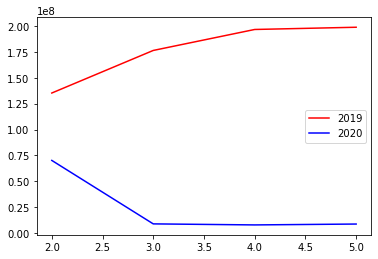

In [207]:
plt.plot(a.loc[2019],c="r",label = "2019")
plt.plot(a.loc[2020],c="b",label = "2020")
plt.legend(loc = "center right")

In [ ]:
import xlrd
define_3 = pd.read_excel("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/카드소비데이터(신한카드)_데이터정의서.xlsx"\
                         ,sheet_name=1,header = 1)
del define_3["Unnamed: 0"]      
define_3